# 🧠 **Studi Kasus: Penentuan Bonus Kinerja Karyawan**
---
## 🎯 Tujuan Sistem

Menentukan besar bonus karyawan (%) berdasarkan beberapa faktor penilaian yang tidak pasti (fuzzy).

---

## 🔢 Variabel Fuzzy

### 1️⃣ Kinerja (Performance)

Range: 0 – 100

| Himpunan | Tipe      |
| -------- | --------- |
| Rendah   | Trapesium |
| Sedang   | Segitiga  |
| Tinggi   | Trapesium |

---

### 2️⃣ Kehadiran (Attendance)

Range: 0 – 100

| Himpunan | Tipe      |
| -------- | --------- |
| Buruk    | Trapesium |
| Cukup    | Segitiga  |
| Baik     | Trapesium |

---

### 3️⃣ Lama Bekerja (Experience)

Range: 0 – 10 tahun

| Himpunan | Tipe      |
| -------- | --------- |
| Baru     | Trapesium |
| Menengah | Segitiga  |
| Lama     | Trapesium |

---

### 4️⃣ Beban Kerja (Workload)

Range: 0 – 100

| Himpunan | Tipe      |
| -------- | --------- |
| Ringan   | Trapesium |
| Normal   | Segitiga  |
| Berat    | Trapesium |

---

## 🎯 Variabel Output
Bonus Karyawan (%)

Range: 0 – 30%

| Himpunan      | Metode                    | Fungsi Keangg Output |
| ------------- | ------------------------- | -------------------- |
| Kecil         | Tsukamoto → monoton turun | 0 – 10               |
| Sedang        | Tsukamoto → monoton naik  | 10 – 20              |
| Besar         | Tsukamoto → monoton naik  | 20 – 30              |

---

📐 Rule Base

* IF kinerja tinggi AND kehadiran baik AND pengalaman lama. THEN bonus besar.
* IF kinerja sedang AND kehadiran baik AND beban kerja berat. THEN bonus besar
* IF kinerja sedang AND kehadiran cukup. THEN bonus sedang
* IF kinerja rendah OR kehadiran buruk. THEN bonus kecil
* IF pengalaman baru AND kinerja tinggi. THEN bonus sedang
* IF beban kerja berat AND kinerja rendah. THEN bonus kecil

---

📊 Data Input

*   Kinerja     = 78
*   Kehadiran   = 85
*   Pengalaman  = 4 tahun
*   Beban kerja = 70



## **Fuzzy Tsukamoto**

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from ipywidgets import interact, FloatSlider

In [ ]:
# 1. Domain Variabel
x_performance = np.arange(0, 101, 1)
x_attendance = np.arange(0, 101, 1)
x_experience = np.arange(0, 11, 1)
x_workload = np.arange(0, 101, 1)

In [ ]:
# 2. Fungsi keanggotaan

# Performance
low_performance = fuzz.trapmf(x_performance, [0, 0, 40, 60])
medium_performance = fuzz.trimf(x_performance, [40, 60, 80])
high_performance = fuzz.trapmf(x_performance, [60, 80, 100, 100])

# Attendance
low_attendance = fuzz.trapmf(x_attendance, [0, 0, 50, 65])
medium_attendance = fuzz.trimf(x_attendance, [50, 70, 90])
high_attendance = fuzz.trapmf(x_attendance, [75, 90, 100, 100])

# Experience
low_experience = fuzz.trapmf(x_experience, [0, 0, 2, 4])
medium_experience = fuzz.trimf(x_experience, [3, 5, 7])
high_experience = fuzz.trapmf(x_experience, [6, 8, 10, 10])

# Workload
low_workload = fuzz.trapmf(x_workload, [0, 0, 30, 50])
medium_workload = fuzz.trimf(x_workload, [40, 60, 80])
high_workload = fuzz.trapmf(x_workload, [70, 85, 100, 100])

In [ ]:
input_performance = 78
input_attendance = 85
input_experience = 4
input_workload = 70

In [ ]:
# 4. Fuzzifikasi

# performance
μ_low_performance = fuzz.interp_membership(x_performance, low_performance, input_performance)
μ_medium_performance = fuzz.interp_membership(x_performance, medium_performance, input_performance)
μ_high_performance = fuzz.interp_membership(x_performance, high_performance, input_performance)

# Attendance
μ_low_attendance = fuzz.interp_membership(x_attendance, low_attendance, input_attendance)
μ_medium_attendance = fuzz.interp_membership(x_attendance, medium_attendance, input_attendance)
μ_high_attendance = fuzz.interp_membership(x_attendance, high_attendance, input_attendance)

# Experience
μ_low_experience =  fuzz.interp_membership(x_experience, low_experience, input_experience)
μ_medium_experience =  fuzz.interp_membership(x_experience, medium_experience, input_experience)
μ_high_experience =  fuzz.interp_membership(x_experience, high_experience, input_experience)

# Workload
μ_low_workload = fuzz.interp_membership(x_workload, low_workload, input_workload)
μ_medium_workload = fuzz.interp_membership(x_workload, medium_workload, input_workload)
μ_high_workload = fuzz.interp_membership(x_workload, high_workload, input_workload)

print(f" Derajat keanggotaan Performance: Rendah={μ_low_performance:.2f}, Sedang={μ_medium_performance:.2f}, Tinggi={μ_high_performance:.2f}")
print(f" Derajat keanggotaan Attendance: Buruk={μ_low_attendance:.2f}, Cukup={μ_medium_attendance:.2f}, Baik={μ_high_attendance:.2f}")
print(f" Derajat keanggotaan Experience: Baru={μ_low_experience:.2f}, Menengah={μ_medium_experience:.2f}, Lama={μ_high_experience:.2f}")
print(f" Derajat keanggotaan Workload: Ringan={μ_low_workload:.2f}, Normal={μ_medium_workload:.2f}, Berat={μ_high_workload:.2f}")


 Derajat keanggotaan Performance: Rendah=0.00, Sedang=0.10, Tinggi=0.90
 Derajat keanggotaan Attendance: Buruk=0.00, Cukup=0.25, Baik=0.67
 Derajat keanggotaan Experience: Baru=0.00, Menengah=0.50, Lama=0.00
 Derajat keanggotaan Workload: Ringan=0.00, Normal=0.50, Berat=0.00


In [ ]:
# Rule Evaluation

# Rule 1: IF kinerja tinggi AND kehadiran baik AND pengalaman lama -> bonus besar
rule1 = min(μ_high_performance, μ_high_attendance, μ_high_experience)

# Rule 2: IF kinerja sedang AND kehadiran baik AND beban kerja berat -> bonus besar
rule2 = min(μ_medium_performance, μ_high_attendance, μ_high_workload)

# Rule 3: IF kinerja sedang AND kehadiran cukup -> bonus sedang
rule3 = min(μ_medium_performance, μ_medium_attendance)

# Rule 4: IF kinerja rendah OR kehadiran buruk -> bonus kecil
rule4 = max(μ_low_performance, μ_low_attendance)

# Rule 5: IF pengalaman baru AND kinerja tinggi -> bonus sedang
rule5 = min(μ_low_experience, μ_high_performance)

# Rule 6: IF beban kerja berat AND kinerja rendah -> bonus kecil
rule6 = min(μ_high_workload, μ_low_performance)

print("Rule Evaluation")
print(f"  Rule 1: {rule1:.2f}")
print(f"  Rule 2: {rule2:.2f}")
print(f"  Rule 3: {rule3:.2f}")
print(f"  Rule 4: {rule4:.2f}")
print(f"  Rule 5: {rule5:.2f}")
print(f"  Rule 6: {rule6:.2f}")

Rule Evaluation
  Rule 1: 0.00
  Rule 2: 0.00
  Rule 3: 0.10
  Rule 4: 0.00
  Rule 5: 0.00
  Rule 6: 0.00


In [ ]:
# 5. DEFUZZIFIKASI

# 1. Domain Output Bonus
x_bonus = np.arange(0, 31, 1)

# 2. Output dari Membership Functions
# Bonus Kecil (monoton turun 0-10): μ(z) = (10 - z) / 10  =>  z = 10 - 10 * μ
def bonus_kecil_inv(mu):
    return 10 - 10 * mu

# Bonus Sedang (monoton naik 10-20): μ(z) = (z - 10) / 10 => z = 10 + 10 * μ
def bonus_sedang_inv(mu):
    return 10 + 10 * mu

# Bonus Besar (monoton naik 20-30): μ(z) = (z - 20) / 10 => z = 20 + 10 * μ
def bonus_besar_inv(mu):
    return 20 + 10 * mu

# 3. Hitung z_i untuk setiap aturan berdasarkan alpha-predicate (kekuatan aturan)

# Rule 1: bonus besar
z1 = bonus_besar_inv(rule1)

# Rule 2: bonus besar
z2 = bonus_besar_inv(rule2)

# Rule 3: bonus sedang
z3 = bonus_sedang_inv(rule3)

# Rule 4: bonus kecil
z4 = bonus_kecil_inv(rule4)

# Rule 5: bonus sedang
z5 = bonus_sedang_inv(rule5)

# Rule 6: bonus kecil
z6 = bonus_kecil_inv(rule6)

print(" Menghitung z_i values untuk setiap bagian:")
print(f"  z1 (from rule1 - Besar): {z1:.2f}")
print(f"  z2 (from rule2 - Besar): {z2:.2f}")
print(f"  z3 (from rule3 - Sedang): {z3:.2f}")
print(f"  z4 (from rule4 - Kecil): {z4:.2f}")
print(f"  z5 (from rule5 - Sedang): {z5:.2f}")
print(f"  z6 (from rule6 - Kecil): {z6:.2f}")

 Menghitung z_i values untuk setiap bagian:
  z1 (from rule1 - Besar): 20.00
  z2 (from rule2 - Besar): 20.00
  z3 (from rule3 - Sedang): 11.00
  z4 (from rule4 - Kecil): 10.00
  z5 (from rule5 - Sedang): 10.00
  z6 (from rule6 - Kecil): 10.00


In [ ]:
# 4. Defuzzifikasi:

# Menjumlahkan alpha_i * z_i
numerator = (rule1 * z1) + (rule2 * z2) + \
            (rule3 * z3) + (rule4 * z4) + \
            (rule5 * z5) + (rule6 * z6)

# Menjumlahkan dari alpha_i
denominator = rule1 + rule2 + rule3 + rule4 + rule5 + rule6

if denominator == 0:
    final_bonus = 0
    print("No rules fired, final bonus is 0.")
else:
    final_bonus = numerator / denominator
    print(f"\nTotal Numerator (Σ(α_i * z_i)): {numerator:.2f}")
    print(f"Total Denominator (Σ α_i): {denominator:.2f}")
    print(f"\nFinal Bonus Karyawan (Tsukamoto): {final_bonus:.2f}%")


Total Numerator (Σ(α_i * z_i)): 1.10
Total Denominator (Σ α_i): 0.10

Final Bonus Karyawan (Tsukamoto): 11.00%


### **Visualisasi**

In [ ]:
# 6. Visualisasi

def tsukamoto_visual(performance, attendance, experience, workload):
  fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(24, 4))

  ax0.plot(x_performance, low_performance, 'b', linewidth=1.5, label='Low')
  ax0.plot(x_performance, medium_performance, 'g', linewidth=1.5, label='Medium')
  ax0.plot(x_performance, high_performance, 'r', linewidth=1.5, label='High')
  ax0.axvline(performance, color='k', linestyle='--')
  ax0.set_title('Performance Membership Functions')
  ax0.set_xlabel('Performance (0-100)')
  ax0.legend()

  ax1.plot(x_attendance, low_attendance, 'b', linewidth=1.5, label='Low')
  ax1.plot(x_attendance, medium_attendance, 'g', linewidth=1.5, label='Medium')
  ax1.plot(x_attendance, high_attendance, 'r', linewidth=1.5, label='High')
  ax1.axvline(attendance, color='k', linestyle='--')
  ax1.set_title('Attendance Membership Functions')
  ax1.set_xlabel('Attendance (0-100)')
  ax1.legend()

  ax2.plot(x_experience, low_experience, 'b', linewidth=1.5, label='Low')
  ax2.plot(x_experience, medium_experience, 'g', linewidth=1.5, label='Medium')
  ax2.plot(x_experience, high_experience, 'r', linewidth=1.5, label='High')
  ax2.axvline(experience, color='k', linestyle='--')
  ax2.set_title('Experience Membership Functions')
  ax2.set_xlabel('Experience (Years)')
  ax2.legend()

  ax3.plot(x_workload, low_workload, 'b', linewidth=1.5, label='Low')
  ax3.plot(x_workload, medium_workload, 'g', linewidth=1.5, label='Medium')
  ax3.plot(x_workload, high_workload, 'r', linewidth=1.5, label='High')
  ax3.axvline(workload, color='k', linestyle='--')
  ax3.set_title('Workload Membership Functions')
  ax3.set_xlabel('Workload (0-100)')
  ax3.legend()

  plt.tight_layout()

  plt.show()

In [ ]:
# Menjalankan slider

interact(
  tsukamoto_visual,
  performance = FloatSlider(min=0, max=100, step=1, value=60),
  attendance = FloatSlider(min=0, max=100, step=1, value=70),
  experience = FloatSlider(min=0, max=10, step=1, value=5),
  workload = FloatSlider(min=0, max=100, step=1, value=60)
)

interactive(children=(FloatSlider(value=60.0, description='performance', step=1.0), FloatSlider(value=70.0, de…

<function __main__.tsukamoto_visual(performance, attendance, experience, workload)>

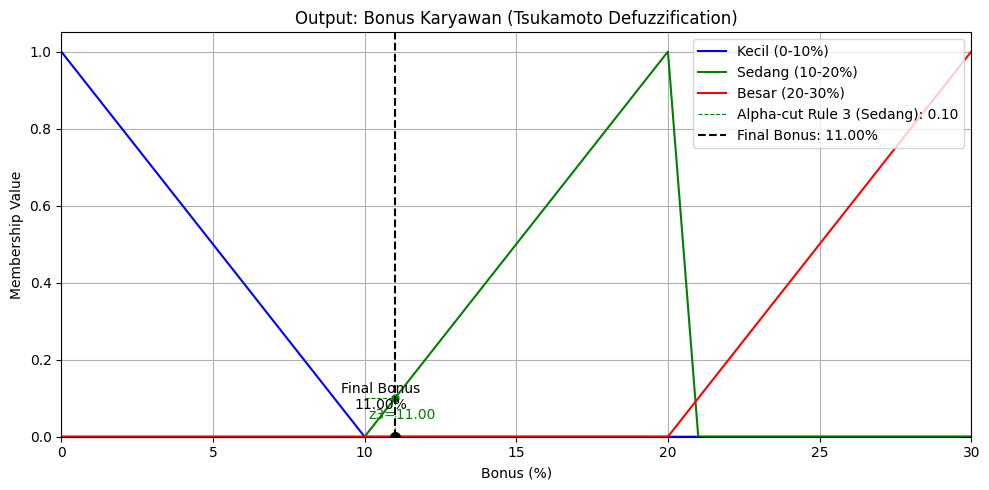

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

# Define output membership functions for plotting
# Kecil (monoton turun 0-10): mu=1 at z=0, mu=0 at z=10
bonus_kecil = fuzz.trimf(x_bonus, [0, 0, 10])
# Sedang (monoton naik 10-20): mu=0 at z=10, mu=1 at z=20
bonus_sedang = fuzz.trimf(x_bonus, [10, 20, 20])
# Besar (monoton naik 20-30): mu=0 at z=20, mu=1 at z=30
bonus_besar = fuzz.trimf(x_bonus, [20, 30, 30])

# Plot the output membership functions
ax.plot(x_bonus, bonus_kecil, 'b', linewidth=1.5, label='Kecil (0-10%)')
ax.plot(x_bonus, bonus_sedang, 'g', linewidth=1.5, label='Sedang (10-20%)')
ax.plot(x_bonus, bonus_besar, 'r', linewidth=1.5, label='Besar (20-30%)')

# Mark alpha-cuts and z_i for active rules

# Rule 3: IF kinerja sedang AND kehadiran cukup -> bonus sedang
# rule3 = 0.10, z3 = 11.00
if rule3 > 0:
    ax.plot([10, z3], [rule3, rule3], 'g--', linewidth=0.8, label=f'Alpha-cut Rule 3 (Sedang): {rule3:.2f}')
    ax.plot([z3, z3], [0, rule3], 'g:', linewidth=0.8)
    ax.plot(z3, rule3, 'go', markersize=5)
    ax.annotate(f'z3={z3:.2f}', (z3, rule3), textcoords="offset points", xytext=(5,-15), ha='center', color='green')

# Mark the final defuzzified bonus
ax.axvline(final_bonus, color='k', linestyle='--', label=f'Final Bonus: {final_bonus:.2f}%')
ax.plot(final_bonus, 0, 'ko', markersize=7)
ax.annotate(f'Final Bonus\n{final_bonus:.2f}%', (final_bonus, 0), textcoords="offset points", xytext=(-10,20), ha='center', color='black')

ax.set_title('Output: Bonus Karyawan (Tsukamoto Defuzzification)')
ax.set_xlabel('Bonus (%)')
ax.set_ylabel('Membership Value')
ax.set_ylim(0, 1.05)
ax.set_xlim(0, 30)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Fuzzy Sugeno**

# 🧠 **Studi Kasus: Penentuan Bonus Kinerja Karyawan**
---
## 🎯 Tujuan Sistem

Menentukan besar bonus karyawan (%) berdasarkan beberapa faktor penilaian yang tidak pasti (fuzzy).

---

## 🔢 Variabel Fuzzy

### 1️⃣ Kinerja (Performance)

Range: 0 – 100

| Himpunan | Tipe      |
| -------- | --------- |
| Rendah   | Trapesium |
| Sedang   | Segitiga  |
| Tinggi   | Trapesium |

---

### 2️⃣ Kehadiran (Attendance)

Range: 0 – 100

| Himpunan | Tipe      |
| -------- | --------- |
| Buruk    | Trapesium |
| Cukup    | Segitiga  |
| Baik     | Trapesium |

---

### 3️⃣ Lama Bekerja (Experience)

Range: 0 – 10 tahun

| Himpunan | Tipe      |
| -------- | --------- |
| Baru     | Trapesium |
| Menengah | Segitiga  |
| Lama     | Trapesium |

---

### 4️⃣ Beban Kerja (Workload)

Range: 0 – 100

| Himpunan | Tipe      |
| -------- | --------- |
| Ringan   | Trapesium |
| Normal   | Segitiga  |
| Berat    | Trapesium |

---

## 🎯 Variabel Output
Bonus Karyawan (%)

---

📐 Rule Base

* IF kinerja tinggi AND kehadiran baik AND pengalaman lama. THEN bonus = 10 + 10% kinerja + 10% kehadiran + 5% pengalaman.
* IF kinerja sedang AND kehadiran baik AND beban kerja berat. THEN bonus = 8 + 5% kinerja + 10% kehadiran + 5% beban kerja
* IF kinerja sedang AND kehadiran cukup. THEN bonus = 6 + 5% kinerja + 5% kehadiran
* IF kinerja rendah OR kehadiran buruk. THEN bonus = 5
* IF pengalaman baru AND kinerja tinggi. THEN bonus = 5 + 10% kinerja
* IF beban kerja berat AND kinerja rendah. THEN bonus = 4
---

📊 Data Input

*   Kinerja     = 78
*   Kehadiran   = 85
*   Pengalaman  = 4 tahun
*   Beban kerja = 70



In [ ]:
# 0. Memasukkan library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from ipywidgets import interact, FloatSlider

In [ ]:
# 1. Membuat lintang angka dari masing masing variabel

x_performance = np.arange(0, 101, 1)
x_attendance = np.arange(0, 101, 1)
x_experience = np.arange(0, 11, 1)
x_workload = np.arange(0, 101, 1)

In [ ]:
# 2. Fungsi keanggotaan

def inputFuzzy(performance, attendance, experience, workload):
  member = {}

  # Performance
  member['low_performance'] = fuzz.interp_membership(x_performance, low_performance, performance)
  member['medium_performance'] = fuzz.interp_membership(x_performance, medium_performance, performance)
  member['high_performance'] = fuzz.interp_membership(x_performance, high_performance, performance)

  # Attendance
  member['low_attendance'] = fuzz.interp_membership(x_attendance, low_attendance, attendance)
  member['medium_attendance'] = fuzz.interp_membership(x_attendance, medium_attendance, attendance)
  member['high_attendance'] = fuzz.interp_membership(x_attendance, high_attendance, attendance)

  # Experience
  member['low_experience'] = fuzz.interp_membership(x_experience, low_experience, experience)
  member['medium_experience'] = fuzz.interp_membership(x_experience, medium_experience, experience)
  member['high_experience'] = fuzz.interp_membership(x_experience, high_experience, experience)

  # Workload
  member['low_workload'] = fuzz.interp_membership(x_workload, low_workload, workload)
  member['medium_workload'] = fuzz.interp_membership(x_workload, medium_workload, workload)
  member['high_workload'] = fuzz.interp_membership(x_workload, high_workload, workload)

  return member

In [ ]:
# 3. Fuzzifikasi

def rules(member):
    alpha = []

    alpha.append(min(member['high_performance'], member['high_attendance'], member['high_experience']))   # Rule 1 → bonus besar
    alpha.append(min(member['medium_performance'], member['high_attendance'], member['high_workload']))   # Rule 2 → bonus besar
    alpha.append(min(member['medium_performance'], member['medium_attendance']))                     # Rule 3 → bonus sedang
    alpha.append(max(member['low_performance'], member['low_attendance']))                           # Rule 4 → bonus kecil
    alpha.append(min(member['low_experience'], member['high_performance']))                          # Rule 5 → bonus sedang
    alpha.append(min(member['high_workload'], member['low_performance']))                            # Rule 6 → bonus kecil

    return alpha


In [ ]:
# 4. Defuzzifikasi

def sugeno(alpha, perf, att, exp, work):
  z = [
      10 + (0.10 * perf) + (0.10 * att) + (0.05 * exp),  # Rule 1
      8 + (0.05 * perf) + (0.10 * att) + (0.05 * work),  # Rule 2
      6 + (0.05 * perf) + (0.05 * att),                  # Rule 3
      5,                                                 # Rule 4
      5 + (0.10 * perf),                                 # Rule 5
      4                                                  # Rule 6
  ]
  sum_alpha = np.sum(alpha)
  return np.sum(np.array(alpha) * np.array(z)) / sum_alpha

In [ ]:
# Input
performance = 78
attendance = 85
experience = 4
workload = 70

member_degrees = {}

# Performance
member_degrees['low_performance'] = fuzz.interp_membership(x_performance, low_performance, performance)
member_degrees['medium_performance'] = fuzz.interp_membership(x_performance, medium_performance, performance)
member_degrees['high_performance'] = fuzz.interp_membership(x_performance, high_performance, performance)

# Attendance
member_degrees['low_attendance'] = fuzz.interp_membership(x_attendance, low_attendance, attendance)
member_degrees['medium_attendance'] = fuzz.interp_membership(x_attendance, medium_attendance, attendance)
member_degrees['high_attendance'] = fuzz.interp_membership(x_attendance, high_attendance, attendance)

# Experience
member_degrees['low_experience'] = fuzz.interp_membership(x_experience, low_experience, experience)
member_degrees['medium_experience'] = fuzz.interp_membership(x_experience, medium_experience, experience)
member_degrees['high_experience'] = fuzz.interp_membership(x_experience, high_experience, experience)

# Workload
member_degrees['low_workload'] = fuzz.interp_membership(x_workload, low_workload, workload)
member_degrees['medium_workload'] = fuzz.interp_membership(x_workload, medium_workload, workload)
member_degrees['high_workload'] = fuzz.interp_membership(x_workload, high_workload, workload)

alpha = rules(member_degrees)

# Hasil akhir
bonus_sugeno = sugeno(alpha, performance, attendance, experience, workload)
print(f"Bonus Karyawan: {bonus_sugeno:.2f}%")

Final Bonus Karyawan: 14.15%


### **Visualisasi**

In [ ]:
# ---------------------------------
# 3. Widget interaktif
# ---------------------------------

def sugeno_visual(performance, attendance, experience, workload):
  fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(24, 4))

  ax0.plot(x_performance, low_performance, 'b', linewidth=1.5, label='Low')
  ax0.plot(x_performance, medium_performance, 'g', linewidth=1.5, label='Medium')
  ax0.plot(x_performance, high_performance, 'r', linewidth=1.5, label='High')
  ax0.axvline(performance, color='k', linestyle='--')
  ax0.set_title('Performance Membership Functions')
  ax0.set_xlabel('Performance (0-100)')
  ax0.legend()

  ax1.plot(x_attendance, low_attendance, 'b', linewidth=1.5, label='Low')
  ax1.plot(x_attendance, medium_attendance, 'g', linewidth=1.5, label='Medium')
  ax1.plot(x_attendance, high_attendance, 'r', linewidth=1.5, label='High')
  ax1.axvline(attendance, color='k', linestyle='--')
  ax1.set_title('Attendance Membership Functions')
  ax1.set_xlabel('Attendance (0-100)')
  ax1.legend()

  ax2.plot(x_experience, low_experience, 'b', linewidth=1.5, label='Low')
  ax2.plot(x_experience, medium_experience, 'g', linewidth=1.5, label='Medium')
  ax2.plot(x_experience, high_experience, 'r', linewidth=1.5, label='High')
  ax2.axvline(experience, color='k', linestyle='--')
  ax2.set_title('Experience Membership Functions')
  ax2.set_xlabel('Experience (Years)')
  ax2.legend()

  ax3.plot(x_workload, low_workload, 'b', linewidth=1.5, label='Low')
  ax3.plot(x_workload, medium_workload, 'g', linewidth=1.5, label='Medium')
  ax3.plot(x_workload, high_workload, 'r', linewidth=1.5, label='High')
  ax3.axvline(workload, color='k', linestyle='--')
  ax3.set_title('Workload Membership Functions')
  ax3.set_xlabel('Workload (0-100)')
  ax3.legend()

  plt.tight_layout()

  plt.show()

In [ ]:
interact(
    sugeno_visual,
    performance = FloatSlider(min=0, max=100, step=1, value=60),
    attendance = FloatSlider(min=0, max=100, step=1, value=70),
    experience = FloatSlider(min=0, max=10, step=1, value=5),
    workload = FloatSlider(min=0, max=100, step=1, value=60)
)

interactive(children=(FloatSlider(value=60.0, description='performance', step=1.0), FloatSlider(value=70.0, de…

<function __main__.sugeno_visual(performance, attendance, experience, workload)>

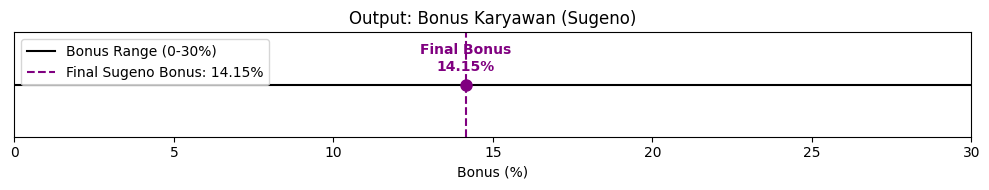

In [ ]:
fig, ax = plt.subplots(figsize=(10, 2))

ax.plot([0, 30], [0, 0], 'k-', linewidth=1.5, label='Bonus Range (0-30%)')

ax.axvline(bonus_sugeno, color='purple', linestyle='--', label=f'Final Sugeno Bonus: {bonus_sugeno:.2f}%')
ax.plot(bonus_sugeno, 0, 'o', color='purple', markersize=8)
ax.annotate(f'Final Bonus\n{bonus_sugeno:.2f}%', (bonus_sugeno, 0),
            textcoords="offset points", xytext=(0,10), ha='center', color='purple', weight='bold')

ax.set_title('Output: Bonus Karyawan (Sugeno)')
ax.set_xlabel('Bonus (%)')
ax.set_yticks([])
ax.set_xlim(0, 30)
ax.set_ylim(-0.1, 0.1)
ax.legend(loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()
